# PostgreSQL

**PostgreSQL is a database - a relational database**!

- Relational databases organize data into tables, which look a lot like spreadsheets. Each row in a table is a record - an individual data item. 


- The columns are the fields or attributes belonging to each item. Each row has a primary key, most often a single column, that allows it to be related to data in other tables.


- You can think of your database as an environment that is quite similar to dataframes in pandas. However, in a relational database they are a bit more formal - they have restrictions on what can be in a column and what can't.

A **Postgres database runs on a Postgres server!**

- First we need to get the Postgres server running, once we have it running we can think about how to create some tables in our database.

- Then, we need a program to run the database - we don't have a user interface at the moment, we need a port - port :5432!

- Then we can send queries to the database. Can be done using SQL - structured query language - it is a very simple language though!

### There are 3 different types of programs we can use:

1. psql - it is a command line program that we can run from our terminal. It is like a bash for Postgres.

2. pgadmin4 - it is a window based tool which you can use to interact with your database. It is a luxury tool which you can scroll through without using a text editor etc.

3. SQLAlchemy - can also connect to the database from Python, allowing us to connect to the database directly.

All 3 methods go in through the same interface - **postgres doesn't care where your query comes** from as long as it **goes through your port :5432!**

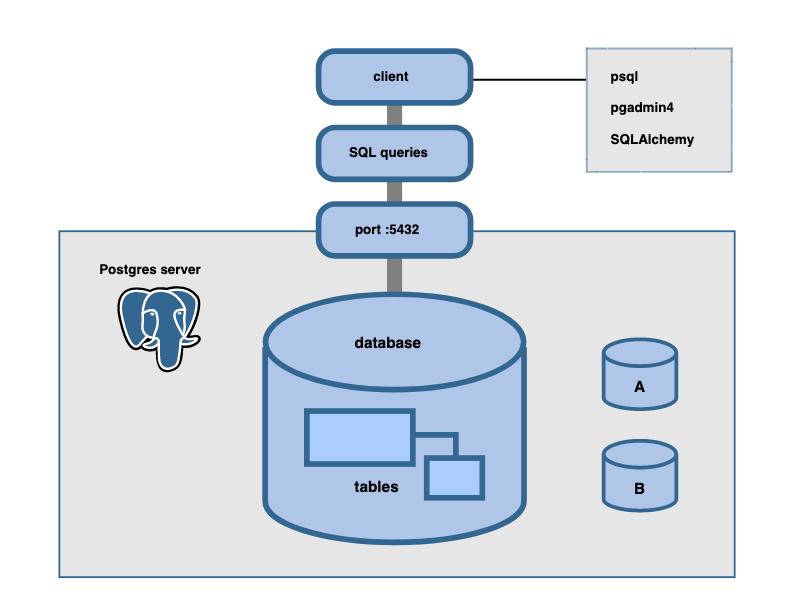

### What else are databases actually good for?

- With postgres, the limitation is at least what sticks on the hard disk, or what can be distributed over multiple physical machines, whereas pandas dataframe can only fit what exists on the memory!

- Different clients can access this - with pandas we're restricted to a single python environment
    - Multiple people can use the same file at a time
    - Multiple languages can connect to the database, so you could have multiple people in multiple languages working on the same database
    
- You can specify that you don't want NaN values, or you can specify you want specific values!

#### We've downloaded PostgreS, installed it, now what?

- Run it from the command line using psql

## CRUD
- Create, read, update, and delete are the four basic functions of persistent storage. 

- **Create** - Create table command with the tablename after it. Inside the brackets you define your column names. You go through a list of column names, then you specify the data type of the 

- **Read** - Select

- **Update** - Update

- **Delete** - Delete

## STRINGS ARE QUOTED IN SINGLE QUOTES ALWAYS!

In [1]:
import pandas as pd

In [2]:
df_links = pd.read_csv('ml-latest-small/links.csv')

In [3]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
df_movies = pd.read_csv('ml-latest-small/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_tags = pd.read_csv('ml-latest-small/tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## SQL - Creating Databases and Tables

### Creating a database

- After successful installation you can create a new database with the createdb command.

`createdb cities`

- After creating a database, you can open psql, the Postgres command line, to start working with it.

`psql -d cities`

- You can also write your commands in a file and use psql to run them.

`psql -d cities -f setup.sql`

- See createdbs.sql file!


### Creating a table

To create a table you use a `CREATE TABLE` statement, specifying the column names you would like to use as well as the data types they may contain.

        CREATE TABLE cities (
            id SERIAL primary key,
            city VARCHAR(255) not null,
            state VARCHAR(255),
            population INTEGER
        );

The **SERIAL** type is really an integer but one that will increment with each row that is added, guaranteeing that each row has a unique primary key.

The **VARCHAR** is for text of a length that is not predetermined. The parenthetical number 255 in the example above specifies the maximum length to allow.

**not null** indicates that the name field is required.

- It is possible to change a table after it has been created, but this can be problematic if there is already a lot of data in the table.

        ALTER TABLE cities ADD COLUMN population INTEGER;

- You can also remove columns

        ALTER TABLE cities DROP COLUMN state;
    
- To add rows to a table you use an **INSERT** statement, specifying the name of the table and the names of the columns you are inserting data into as well as the values for each column.

        INSERT INTO cities (city, country, population) VALUES ('Berlin', 'Germany', 3610156);

- To update a row or rows, you use an `UPDATE` statement.

        UPDATE cities SET city = 'Munich' WHERE city = 'Munch';

- The `WHERE` clause performs a query to find the row or rows to update.

`SELECT` statements perform queries:

        SELECT * FROM cities;

         id |  city   | country | population
        ----+---------+---------+------------
          1 | Berlin  | Germany |    3610156
          2 | Hamburg | Germany |    1774242
          3 | Munich  | Germany |    1450381
  
You can specify the fields you want to see in the result and have them appear with a different name that you specify with `AS`.

        SELECT city AS town, population AS citizens FROM cities;

          town   | citizens
        ---------+----------
         Berlin  |  3610156
         Hamburg |  1774242
         Munich  |  1450381

### Deleting data
- To delete a row or rows, you use `**DELETE**`.

        DELETE FROM cities WHERE country <> 'Germany';

**(The <> in the example above means ‘not equal’.)**

The **DROP** command removes tables, indices etc. Note that there is no way of undoing this!

        DROP TABLE cities;

## SQL Commands

### Main elements of a SQL query:
        
SELECT columns, aggregate(column)

       FROM table_or_subquery
       INNER/OUTER JOIN other_table ON condition
       WHERE condition
       GROUP BY columns
       HAVING condition_after_aggregation
       ORDER BY column ASC|DESC
       LIMIT number;

### psql database -f filename.sql

eg psql movies -f create_dbs.sql; - Takes a file that we've created in Atom and makes a database off of that!

### DROP TABLE tablename / DROP ALL TABLES

eg DROP TABLE ratings; - removes specified table from the database

### DROP SCHEMA schemaname / CREATE SCHEMA name

DROP SCHEMA public CASCADE; - Automatically drop objects (tables, functions, etc.) that are contained in the schema, i.e. public

RESTRICT; - Refuse to drop the schema if it contains any objects. This is the default.

### ALTER TABLE table RENAME column-name TO new-column

eg ALTER TABLE ratings RENAME rating TO newrating; - Changes column name of a table

### COPY table FROM 'fullpathway/Users/maximcondon/...' DELIMITER ',' CSV HEADER;

eg COPY movies FROM '/Users/maximcondon/Desktop/Spiced/06_Week_6/ml-latest-small/movies.csv' DELIMITER ','CSV HEADER; - Copies into table the CSV file from the directed full pathway! CSV header is like skiprows, DELIMITER ',' does something important

### SELECT column, aggregate(col)

### FROM table | view
  
  **(SELECT subquery)**
  
SELECT count(*) FROM movies; - Gives the total count of rows in that column

SELECT COUNT(movieId) FROM movies; - Counts movieId column

SELECT * FROM movies; - displays everything in the table's columns

SELECT title FROM movies; - Returns the title of every film in the movies column(need to press enter to get more)

SELECT title, genre FROM movies; - Selects multiple columns from the table

### LIMIT num; - limits number of rows

SELECT title, genres FROM movies LIMIT 3; - Selects multiple columns from the table, but limits it to 3 rows
  
### WHERE condition(s)

e.g. SELECT title FROM movies WHERE title ~'Jum.*'; - Incorporates RegEx. Searches for Jum and allows any characters after that

SELECT title FROM movies WHERE title ~'Jum'; - Seems to do the same?


SELECT title FROM movies WHERE title ~'jum.*'; - yields nothing, the lowercase is important!

SELECT title FROM movies WHERE title ~'Jum*'; - This makes the 'm' optional and yields more results!

SELECT title FROM movies WHERE title ~* 'star \w{4}\W'; - searches for any title with the name 'Star' followed by 4 alphanumeric characters! ~* searches for uppercase and lowercase!

SELECT title FROM movies WHERE title ~ 'Star Wors'; - Can work out some fuzzy search to avoid typos returning nothing!

### GROUP BY column(s)

eg SELECT genres, count(movieid) FROM movies GROUP BY genres; - groups the genres of the movies by their movieId

eg SELECT genres, count(movieid) FROM movies GROUP BY genres LIMIT 5; - limits this to 5

### ORDER BY column (and optionally) DESC (for descending)

eg SELECT genres, count(movieid) FROM movies GROUP BY genres ORDER by count(movieid) LIMIT 5; - This orders the group by by ascending order of the number of counts there are of those films of that genre!

SELECT genres, count(movieid) FROM movies GROUP BY genres ORDER BY count(movieid) DESC LIMIT 20; - Does the same but in descending order, limits to the 20 most frequent genres.

SELECT title FROM movies WHERE title ~* 'star \w{4}\W' ORDER BY title LIMIT 10; - Selects films with 'Star ....' in the title and orders them alphabetically!

SELECT genres, count(movieid) FROM movies WHERE genres ~* 'comedy' GROUP BY genres ORDER BY count(movieid) DESC; - This gives us a count of the films with at least one of the genres being Comedy, can include a limit

SELECT genres, count(movieid) FROM movies WHERE genres ~* 'sci' GROUP BY genres ORDER BY count(movieid) DESC LIMIT 5; - This does the same but for Sci-fi

### HAVING conditions(s)

- It is a condition you would apply after the grouping takes place!

SELECT genres, count(movieid) FROM movies WHERE genres ~* 'comedy' GROUP BY genres HAVING count(movieid) > 100 ORDER BY count(movieid) DESC; - Only includes genres where the count of the comedy genre HAS over 100 counts!

#### now( ) - adds a timestamp

#### random( ) - generates a number between 0 and 1
        
SELECT title, now( ), random( )*6 FROM movies WHERE title ~* 'star \w{4}\W' LIMIT 5; - now adds( ) a time stamp, random( ) adds a random number between 0 and 1, which is multiplied by 6 - don't know why?

SELECT title, random( )*6 r FROM movies WHERE title ~* 'star \w{4}\W' LIMIT 5;

SELECT title, random( )*6 r FROM movies WHERE title ~* '
;
;
SELECT title t, random( )*6 r FROM movies
WHERE t ~* 'star \w{4}\W'
AND r > 5.0;

SELECT title AS t, random( )*6 r FROM movies
WHERE t ~* 'star \w{4}\W'
AND r > 5.0;

SELECT title, random( )*6 r FROM movies
WHERE title ~* 'star \w{4}\W'
AND r > 5.0;

SELECT title, random( )*6 r FROM movies
WHERE title ~* 'star \w{4}\W'
HAVING r > 5.0;

SELECT title, random( )*6 AS r FROM movies
WHERE title ~* 'star \w{4}\W'
HAVING r > 5.0;

SELECT title FROM movies
WHERE title ~* 'star \w{4}\W' AND random( ) * 6 > 5;

SELECT title FROM movies
WHERE title ~* 'star \w{4}\W' OR random( ) * 6 > 5 LIMIT 10;

SELECT title FROM movies
WHERE title ~* 'star \w{4}\W' OR random( ) * 1000 < 1 LIMIT 10;

SELECT title FROM movies
WHERE title ~* 'star \w{4}\W' OR random( ) * 500 < 1 LIMIT 10;

SELECT now( );

SELECT now( )-date FROM movies LIMIT 3;

CREATE TABLE dates AS SELECT title, now( ) n FROM movies LIMIT 10;

SELECT * FROM dates;

SELECT now( ) - n FROM dates;

SELECT now( ) - n FROM dates;

SELECT genres FROM movies LIMIT 5;

SELECT * FROM movies LIMIT 1;

\s out.txt

### INSERT INTO column VALUES (row values, ... , ...)

eg INSERT INTO movies VALUES(1, 'Star Wars', 'comedy, sci-fi'); - Adds a row, with the details for each column included

### DELETE FROM table

eg DELETE FROM movies; - deletes everything in the table


#### \d - describes your database

#### \d table - describes the table within your database

eg \d movies, \d ratings, \d tags, ...

#### \dt - only gives you the information on tables in your database


## SQL JOINs

**In SQL, there are 4 ways of joining tables**. Here are the different types of JOINs:

### INNER JOIN: Returns records that have matching values in both tables
The INNER JOIN selects all rows from both participating tables as long as there is a match between the columns. A SQL INNER JOIN is same as JOIN clause, combining rows from two or more tables.

If they have a column in common, an inner join is finding the intersection between the two, and gives you that

### LEFT (OUTER) JOIN: Return all records from the left table, and the matched records from the right table

### RIGHT (OUTER) JOIN: Return all records from the right table, and the matched records from the left table

### FULL (OUTER) JOIN: Return all records when there is a match in either left or right table

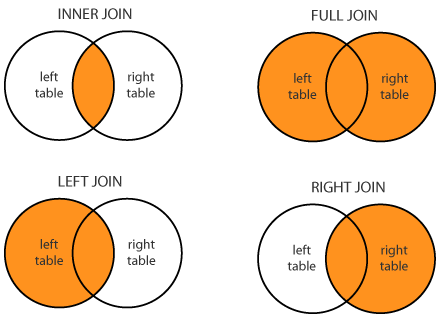